<a href="https://colab.research.google.com/github/yachika-yashu/Online-Purchase-Orders-Classification/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Online Purchase Orders Classification
You are given a data set (i.e. risk-dataset.txt) that describes 30,000 online purchase
orders for an online trader. Each example in the data set corresponds to an online
purchase order and is described by 44 attributes. A detailed description of the
attributes can be found in risk-attributes.txt.
The second attribute is the target (i.e., class) attribute that indicates whether an order
has a high risk of default payment. The class attribute has two values: "yes," meaning
high risk and "no," indicating low risk.
Your task is to help the online trader recognize if a person who makes an order is a
customer who will eventually pay for the goods using machine learning techniques.
You will use classification algorithms to build a prediction model based on the data.

Part 1: Data Preprocessing
1. Data Loading
2. Data Normalization
3. Data Visualization
4. Data Augmentation (Optional)
Part 2: Machine Learning Models
1. Model Selection
2. Model Training
3. Hyperparameter Tuning
4. Model Evaluation:
Part 3: Reporting
1. Results Compilation and Discussion
2. Error Analysis
➢ Analyze misclassified samples to identify common patterns or
ambiguities.
3. Interpretable Models (Optional)
➢ Use interpretability techniques like SHAP or LIME to understand the
decision-making process of models.

In [300]:
# ================== IMPORT LIBRARIES ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_curve, roc_auc_score
import joblib
from sklearn.preprocessing import label_binarize
import seaborn as sns



# ================== 1. LOAD THE DATASET ==================

In [301]:
# ================== 1. LOAD THE DATASET ==================
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/risk-dataset.txt', sep="\t")
# Quick look at the data
df.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1/17/1973,yes,yes,check,?,5.2006,...,no,no,no,8,yes,0,0.00,?,?,?
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,yes,no,no,13,yes,0,0.00,?,?,?
2,49923,no,yes,no,4/3/1972,yes,no,check,?,12.2007,...,no,no,no,3,yes,0,0.00,?,?,?
3,49924,no,no,yes,8/1/1966,yes,no,check,?,1.2007,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,16,yes,0,0.00,?,?,?


# ================== 2. DATA CLEANING ==================


In [302]:
# Information on types and non-null counts
print(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ORDER_ID           30000 non-null  int64  
 1   CLASS              30000 non-null  object 
 2   B_EMAIL            30000 non-null  object 
 3   B_TELEFON          30000 non-null  object 
 4   B_BIRTHDATE        30000 non-null  object 
 5   FLAG_LRIDENTISCH   30000 non-null  object 
 6   FLAG_NEWSLETTER    30000 non-null  object 
 7   Z_METHODE          30000 non-null  object 
 8   Z_CARD_ART         30000 non-null  object 
 9   Z_CARD_VALID       30000 non-null  float64
 10  Z_LAST_NAME        30000 non-null  object 
 11  VALUE_ORDER        30000 non-null  float64
 12  WEEKDAY_ORDER      30000 non-null  object 
 13  TIME_ORDER         30000 non-null  object 
 14  AMOUNT_ORDER       30000 non-null  int64  
 15  ANUMMER_01         30000 non-null  int64  
 16  ANUMMER_02         300

Interpretation by seeing the columns, and attributes
- 1. ORDER_ID' - it is just id we can remove this column

- 2. 'CLASS' - this is target column

- 3. There are some columns that can be deleted
'ANUMMER_01', 'ANUMMER_02', 'ANUMMER_03','ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07','ANUMMER_08','ANUMMER_09','ANUMMER_10',

- 4. There are some columns with yes, no (Binary) values, we can do encoding for them later
 'B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER','CHK_LADR','CHK_RADR' 'CHK_KTO','CHK_CARD', 'CHK_COOKIE', CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT''FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'NEUKUNDE',

 - 5. There are some numeric data columns
 'VALUE_ORDER_PRE': Total value of previous orders,
 'VALUE_ORDER', int value of order in euro
'SESSION_TIME': duration of online session


- 6.  There are some categorical columns for which we can do OneHotEncoding
'AMOUNT_ORDER': Number of ordered items
'AMOUNT_ORDER_PRE':  Total number of items of previous orders
'Z_METHODE', method of payment
'WEEKDAY_ORDER'-day of week
'Z_CARD_ART', type of card
'MAHN_AKT' Current stage of reminder of the customer, if available
MAHN_HOECHST Highest stage of reminder of the customer occurred up to now, if available
'Z_LAST_NAME'
'Z_CARD_VALID', date expiration
'TIME_ORDER', : time
'B_BIRTHDATE':dob
'DATE_LORDER', : last order date

In [303]:
col_to_remove=['ORDER_ID','ANUMMER_01', 'ANUMMER_02', 'ANUMMER_03','ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07','ANUMMER_08','ANUMMER_09','ANUMMER_10']
df.drop(columns=col_to_remove,inplace=True)


In [304]:
# handling missing values, Check for missing values (sorted by highest)
print(df.isnull().sum().sort_values(ascending=False))

CLASS                0
B_EMAIL              0
B_TELEFON            0
B_BIRTHDATE          0
FLAG_LRIDENTISCH     0
FLAG_NEWSLETTER      0
Z_METHODE            0
Z_CARD_ART           0
Z_CARD_VALID         0
Z_LAST_NAME          0
VALUE_ORDER          0
WEEKDAY_ORDER        0
TIME_ORDER           0
AMOUNT_ORDER         0
CHK_LADR             0
CHK_RADR             0
CHK_KTO              0
CHK_CARD             0
CHK_COOKIE           0
CHK_IP               0
FAIL_LPLZ            0
FAIL_LORT            0
FAIL_LPLZORTMATCH    0
FAIL_RPLZ            0
FAIL_RORT            0
FAIL_RPLZORTMATCH    0
SESSION_TIME         0
NEUKUNDE             0
AMOUNT_ORDER_PRE     0
VALUE_ORDER_PRE      0
DATE_LORDER          0
MAHN_AKT             0
MAHN_HOECHST         0
dtype: int64


No null values but I doubt , null values in disguise '?'

In [305]:
df = df.replace('?', pd.NA)

In [306]:
print(df.isnull().sum().sort_values(ascending=False))

Z_CARD_ART           18654
DATE_LORDER          15856
MAHN_AKT             15856
MAHN_HOECHST         15856
Z_LAST_NAME          14808
B_BIRTHDATE           2942
TIME_ORDER              20
CLASS                    0
FLAG_LRIDENTISCH         0
Z_CARD_VALID             0
Z_METHODE                0
VALUE_ORDER              0
WEEKDAY_ORDER            0
AMOUNT_ORDER             0
FLAG_NEWSLETTER          0
B_TELEFON                0
B_EMAIL                  0
CHK_KTO                  0
CHK_RADR                 0
CHK_LADR                 0
CHK_CARD                 0
FAIL_LORT                0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_RORT                0
FAIL_RPLZ                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZORTMATCH        0
AMOUNT_ORDER_PRE         0
NEUKUNDE                 0
SESSION_TIME             0
VALUE_ORDER_PRE          0
dtype: int64


null values in Z_CARD_ART, DATE_LORDER, MAHN_AKT, MAHN_HOECHST, Z_LAST_NAME, B_BIRTHDATE, TIME_ORDER   

In [307]:
# lets see distribution of binary columns
binary_columns=['B_EMAIL','B_TELEFON','FLAG_LRIDENTISCH','FLAG_NEWSLETTER','CHK_LADR','CHK_RADR','CHK_KTO','CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT','FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'NEUKUNDE']
for i in binary_columns:
  print(df[i].value_counts())

B_EMAIL
yes    23963
no      6037
Name: count, dtype: int64
B_TELEFON
no     25493
yes     4507
Name: count, dtype: int64
FLAG_LRIDENTISCH
yes    21157
no      8843
Name: count, dtype: int64
FLAG_NEWSLETTER
no     28772
yes     1228
Name: count, dtype: int64
CHK_LADR
no     28865
yes     1135
Name: count, dtype: int64
CHK_RADR
no     29889
yes      111
Name: count, dtype: int64
CHK_KTO
no     29912
yes       88
Name: count, dtype: int64
CHK_CARD
no     29893
yes      107
Name: count, dtype: int64
CHK_COOKIE
no     29905
yes       95
Name: count, dtype: int64
CHK_IP
no     29879
yes      121
Name: count, dtype: int64
FAIL_LPLZ
no     29835
yes      165
Name: count, dtype: int64
FAIL_LORT
no     29849
yes      151
Name: count, dtype: int64
FAIL_LPLZORTMATCH
no     29772
yes      228
Name: count, dtype: int64
FAIL_RPLZ
no     29674
yes      326
Name: count, dtype: int64
FAIL_RORT
no     29693
yes      307
Name: count, dtype: int64
FAIL_RPLZORTMATCH
no     29637
yes      363
Name: count, d

all of these binary columns are already int so no need to replace

In [308]:
for col in binary_columns:
    print(col, df[col].unique())

B_EMAIL ['yes' 'no']
B_TELEFON ['no' 'yes']
FLAG_LRIDENTISCH ['yes' 'no']
FLAG_NEWSLETTER ['yes' 'no']
CHK_LADR ['no' 'yes']
CHK_RADR ['no' 'yes']
CHK_KTO ['no' 'yes']
CHK_CARD ['no' 'yes']
CHK_COOKIE ['no' 'yes']
CHK_IP ['no' 'yes']
FAIL_LPLZ ['no' 'yes']
FAIL_LORT ['no' 'yes']
FAIL_LPLZORTMATCH ['no' 'yes']
FAIL_RPLZ ['no' 'yes']
FAIL_RORT ['no' 'yes']
FAIL_RPLZORTMATCH ['no' 'yes']
NEUKUNDE ['yes' 'no']


all of these columns have just two values :yes and no and there are no null values

In [309]:
# Removing duplicates
df.duplicated().sum()

np.int64(0)

No duplicates

float64
count    30000.000000
mean        43.968058
std         35.709431
min          5.200000
25%         17.990000
50%         34.500000
75%         57.800000
max        361.200000
Name: VALUE_ORDER, dtype: float64
0
float64
count    30000.000000
mean        29.875652
std         57.382732
min          0.000000
25%          0.000000
50%          0.000000
75%         38.470000
max       1047.800000
Name: VALUE_ORDER_PRE, dtype: float64
0
int64
count    30000.000000
mean         8.577900
std          3.863448
min          1.000000
25%          6.000000
50%          9.000000
75%         11.000000
max         24.000000
Name: SESSION_TIME, dtype: float64
0


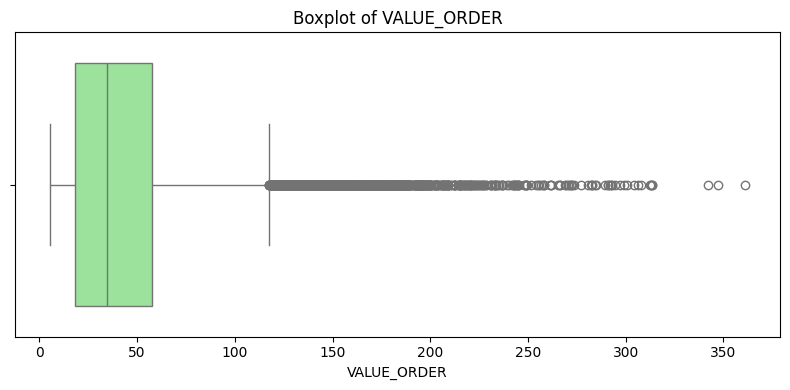

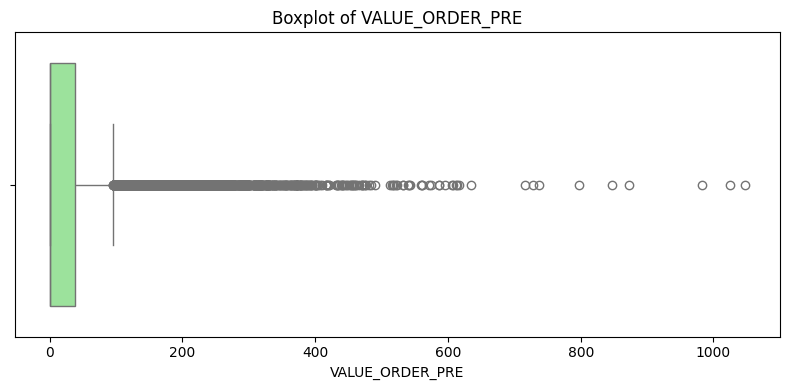

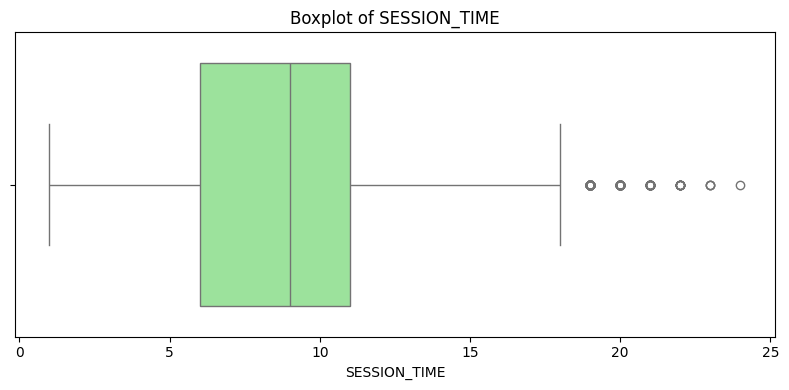

In [310]:
#lets deal with numeric values
num_columns=['VALUE_ORDER','VALUE_ORDER_PRE','SESSION_TIME']
for col in num_columns:
  print(df[col].dtype)
  print(df[col].describe())
  print(df[col].isnull().sum())
for col in num_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

Z_METHODE
check          14808
credit_card     9796
debit_note      3846
debit_card      1550
Name: count, dtype: int64
0
Z_METHODE ['check' 'credit_card' 'debit_note' 'debit_card']
WEEKDAY_ORDER
Saturday     5958
Sunday       5357
Wednesday    4296
Friday       4224
Thursday     3618
Monday       3571
Tuesday      2976
Name: count, dtype: int64
0
WEEKDAY_ORDER ['Saturday' 'Wednesday' 'Friday' 'Tuesday' 'Thursday' 'Sunday' 'Monday']
AMOUNT_ORDER_PRE
0    15856
1    10986
2     2463
3      535
4      125
5       26
6        9
Name: count, dtype: int64
0
AMOUNT_ORDER_PRE ['0' '4' '1' '2' '3' '5' '6']
AMOUNT_ORDER
1    22147
2     4655
3     1866
4      791
5      335
6      111
7       61
8       27
9        7
Name: count, dtype: int64
0
AMOUNT_ORDER ['1' '4' '2' '3' '5' '7' '6' '8' '9']


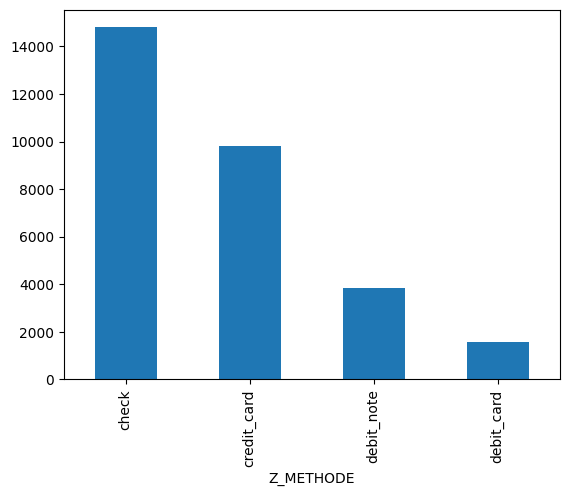

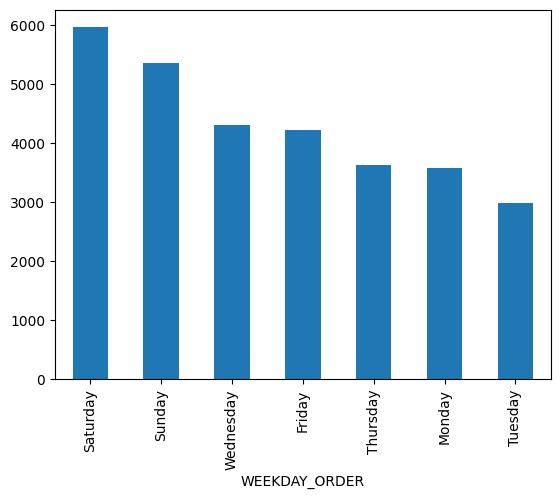

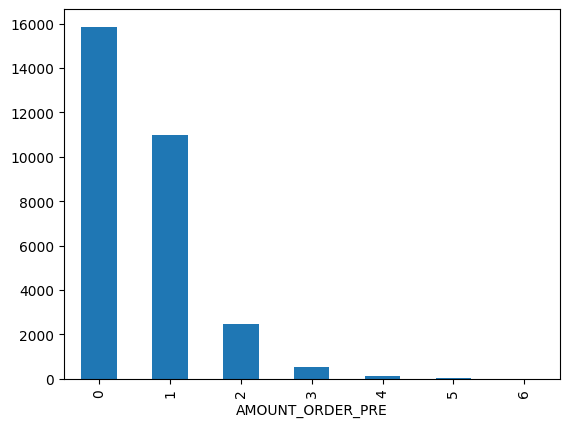

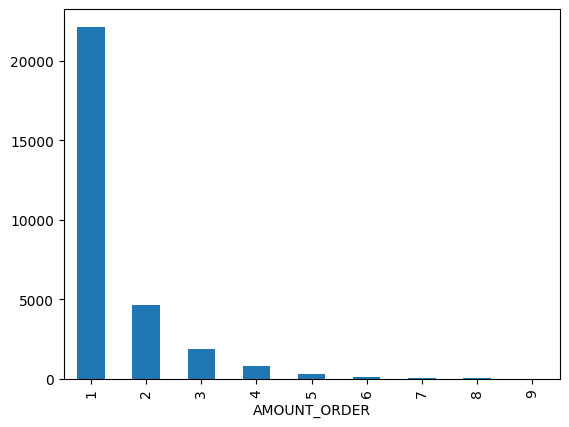

In [311]:
#lets deal with calegorical columns with no null values
cat_columns=['Z_METHODE','WEEKDAY_ORDER', 'AMOUNT_ORDER_PRE','AMOUNT_ORDER']
for col in cat_columns:
  df[col] = df[col].astype(str)
#method of payment and type of card
for i in cat_columns:
  print(df[i].value_counts())
  print(df[i].isnull().sum())
  print(i, df[i].unique())
for i in cat_columns:
  df[i].value_counts().plot(kind='bar')
  plt.show()


In [312]:
# let's deal with 'Z_CARD_VALID' it denotes the expiry date of the card
# we will apply feature extraction on this column- this column is useless to our target unless we convert it to number of remaining months until expiration

df['Z_CARD_VALID'] = df['Z_CARD_VALID'].astype(str)
df['Z_CARD_VALID_formatted'] = pd.to_datetime(
    df['Z_CARD_VALID'],
    format='%m.%Y',
    errors='coerce'
)

#lets use last order column to find max date and use that date as a reletive to today's date
today = pd.to_datetime(df['DATE_LORDER'], errors='coerce').max()



df['CARD_MONTHS_TO_EXPIRY'] = (
    (df['Z_CARD_VALID_formatted'].dt.year - today.year) * 12 +
    (df['Z_CARD_VALID_formatted'].dt.month - today.month)
)

df['CARD_MONTHS_TO_EXPIRY'].value_counts()
# this new column CARD_MONTHS_TO_EXPIRY is a numerical column

,count
CARD_MONTHS_TO_EXPIRY,
26,894
10,892
13,890
27,873
22,868
2,864
14,864
25,855
24,853


In [313]:
#we can delete 'Z_CARD_VALID' and 'Z_CARD_VALID_formatted'
col_to_remove=['Z_CARD_VALID','Z_CARD_VALID_formatted']
df.drop(columns=col_to_remove,inplace=True)

In [314]:
#lets deal with columns with missing values
#1. 'Z_CARD_ART': z_card_art contains missing values but why? this column give info about type of card if payment by card is chosen. lets see for all the missing value is it because they are not paying bycard
df.loc[df['Z_CARD_ART'].isna(), 'Z_METHODE'].value_counts()

,count
Z_METHODE,
check,14808
debit_note,3846


In [315]:
#distrivution says it all, the missing values are because they are paid by check or debit card so lets fill null values with 'not_a_card_payment'
df['Z_CARD_ART'] = df['Z_CARD_ART'].fillna('not_a_card_payment')
#now this column is a categorical column

In [316]:
#z_last name contains missing value. this mean Payment method doesn’t involve a named account/card or Name not required (invoice, guest checkout, etc.)
#lets investigate, Among rows where Z_LAST_NAME is 'NAN', what are the payment methods?
df.loc[df['Z_LAST_NAME'].isna(), 'Z_METHODE'].value_counts()




,count
Z_METHODE,
check,14808


Every single one of them used Z_METHODE = 'check' (14,808 rows). so here might be the case Customers paying by check may not be required to provide a name or it came from a #legacy business so lets impute NULL values with not applicable

In [317]:
df['Z_LAST_NAME'] = df['Z_LAST_NAME'].fillna('not_applicable')
#now this column is a categorical column

In [318]:
#lets find the reason for missing 'MAHN_AKT' and 'MAHN_HOECHST'
df.loc[df['MAHN_AKT'].isna(), 'NEUKUNDE'].value_counts()
#clear reason for null values 15032 were new customers

,count
NEUKUNDE,
yes,15032
no,824


In [319]:
#for those who were not new customers
df.loc[((df['MAHN_AKT'].isna()) & (df['NEUKUNDE'] == 'no')),'Z_METHODE'].value_counts()
#they were paying hrough debit card so no online order so reminder system not applicable
#so lets impute missing values with -1

,count
Z_METHODE,
debit_card,824


In [320]:
#is the values same for both columns
df[['MAHN_HOECHST', 'MAHN_AKT']]

,MAHN_HOECHST,MAHN_AKT
0,<NA>,<NA>
1,<NA>,<NA>
2,<NA>,<NA>
3,0,0
4,<NA>,<NA>
...,...,...
29995,3,0
29996,0,0
29997,<NA>,<NA>
29998,0,0


In [321]:
#so lets impute missing values with -1
df['MAHN_AKT'] = df['MAHN_AKT'].fillna(-1)
df['MAHN_HOECHST'] = df['MAHN_HOECHST'].fillna(-1)

df['MAHN_AKT'] = df['MAHN_AKT'].astype(str)

df['MAHN_HOECHST'] = df['MAHN_HOECHST'].astype(str)
#now both of these columns are categorical columns

In [322]:
#lets deal with DATE_LORDER and investigate reasons for missing values, lets see if missing last order means that person is a new customer
df.loc[df['DATE_LORDER'].isna(), 'NEUKUNDE'].value_counts()

,count
NEUKUNDE,
yes,15032
no,824


In [323]:

df.loc[((df['DATE_LORDER'].isna()) & (df['NEUKUNDE'] == 'no')),'Z_METHODE'].value_counts()

,count
Z_METHODE,
debit_card,824


clearly reason for no last order for 15856 customes is new customer= 15032 and rest debit card payment=824

In [324]:
#we will no impute anything in the missing values let it be null
#feature extraction
#How long ago was the last order?
df['DATE_LORDER'] = pd.to_datetime(df['DATE_LORDER'], errors='coerce')
df['MONTHS_SINCE_LAST_ORDER'] = ((today - df['DATE_LORDER']).dt.days)/30
df['MONTHS_SINCE_LAST_ORDER']
#this new column is a numerical column

,MONTHS_SINCE_LAST_ORDER
0,NaN
1,NaN
2,NaN
3,32.766667
4,NaN
...,...
29995,34.900000
29996,44.200000
29997,NaN
29998,43.266667


In [325]:
#Lets delete df['DATE_LORDER']
df.drop(columns=['DATE_LORDER'], inplace=True)

In [326]:
# lets handle birthdate column
#again same missing dob are because it is not mandatory field
df['B_BIRTHDATE'] = pd.to_datetime(df['B_BIRTHDATE'],format= '%m/%d/%Y',
    errors='coerce')
df['B_BIRTHDATE']
#feature extraction
#Extract age from birthdate
df['AGE'] = (today - df['B_BIRTHDATE']).dt.days // 365
df['AGE']
# age is a numerical column

,AGE
0,32.0
1,34.0
2,32.0
3,38.0
4,35.0
...,...
29995,23.0
29996,32.0
29997,24.0
29998,24.0


In [327]:
#feature extraction
#Extract age-group from age
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df['AGE_GROUP']
#age group is a categorical column

,AGE_GROUP
0,25-35
1,25-35
2,25-35
3,35-45
4,25-35
...,...
29995,<25
29996,25-35
29997,<25
29998,<25


In [328]:
#lets delete df['B_BIRTHDATE']
df.drop(columns=['B_BIRTHDATE'], inplace=True)

In [329]:
#lets handle 'TIME_ORDER'
#feature extraction
#Extract order hour from time_order
df['ORDER_HOUR'] = pd.to_datetime(df['TIME_ORDER'], format='%H:%M', errors='coerce').dt.hour
df['ORDER_HOUR']
#this column is a numerical column

,ORDER_HOUR
0,9.0
1,17.0
2,11.0
3,2.0
4,23.0
...,...
29995,18.0
29996,15.0
29997,10.0
29998,1.0


In [330]:
#feature extraction
#Extract part of the day from order hour
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['ORDER_PART_OF_DAY'] = df['ORDER_HOUR'].apply(part_of_day)
df['ORDER_PART_OF_DAY']
#THIS IS A CATEGORICAL COLUMN

,ORDER_PART_OF_DAY
0,morning
1,evening
2,morning
3,night
4,night
...,...
29995,evening
29996,afternoon
29997,morning
29998,night


In [331]:
#lets delete df['TIME_ORDER']
df.drop(columns=['TIME_ORDER'], inplace=True)

In [332]:
from pathlib import Path

# create folder if it doesn't exist
cleaned_path = Path("/content/drive/MyDrive/Colab Notebooks/data/cleaned")
cleaned_path.mkdir(parents=True, exist_ok=True)

# save cleaned data
df.to_parquet(cleaned_path / "cleaned_data1.csv", index=False)

I wanted my datatypes to be as is when I load this cleaned data for model selection